Section 2, Part 1: AI-Generated Text Classification
Naive Bayes Classification Results:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.96      0.94      0.95        48

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

Confusion Matrix:
 [[50  2]
 [ 3 45]]

Neural Network Classification Results:
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        52
         1.0       0.94      0.98      0.96        48

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix:
 [[49  3]
 [ 1 47]]


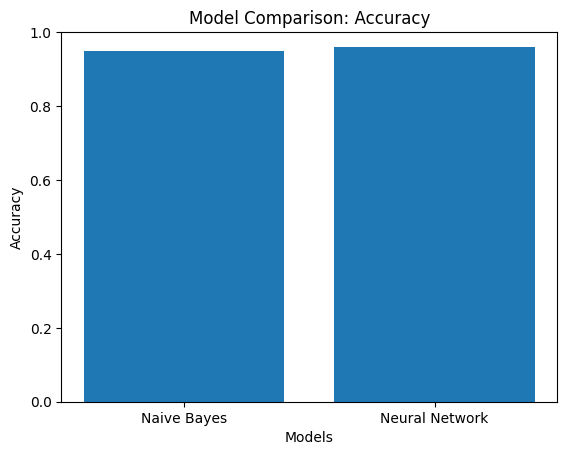



Section 2, Part 2: Orthography Prediction
Available columns: ['Unnamed: 0', 'words', 'IPA']
Epoch 1/1, Loss: 0.5503

Random Word Predictions:
Phonological Input (IPA): dZɑkɑs                          
True Orthographic Form: jackass                         
Predicted Orthographic Form: deacas                          

Phonological Input (IPA): IlEkt                           
True Orthographic Form: elect                           
Predicted Orthographic Form: ilect                           

Phonological Input (IPA): jOn                             
True Orthographic Form: yon                             
Predicted Orthographic Form: uon                             

Phonological Input (IPA): dEfInIt                         
True Orthographic Form: def                             
Predicted Orthographic Form: definnt                         

Phonological Input (IPA): krVstIlI                        
True Orthographic Form: crustily                        
Predicted Orthographic F

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Part 1: AI-Generated Text Classification
def ai_text_classification():
    # Load the dataset
    df = pd.read_csv('section2_data1.csv')

    # Bag of Words Transformation
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(df['text'])
    y = df['generated'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Naive Bayes Model
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train, y_train)
    nb_predictions = nb_classifier.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)

    print("Naive Bayes Classification Results:")
    print("Accuracy:", nb_accuracy)
    print("Classification Report:\n", classification_report(y_test, nb_predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))

    # Neural Network Model
    class TextClassificationNN(nn.Module):
        def __init__(self, input_size):
            super(TextClassificationNN, self).__init__()
            self.network = nn.Sequential(
                nn.Linear(input_size, 64),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(32, 1),
                nn.Sigmoid()
            )

        def forward(self, x):
            return self.network(x)

    # Convert sparse matrix to dense tensor
    X_train_tensor = torch.FloatTensor(X_train.toarray())
    X_test_tensor = torch.FloatTensor(X_test.toarray())
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize model, loss, and optimizer
    model = TextClassificationNN(X_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        nn_predictions = []
        true_labels = []
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            nn_preds = (outputs > 0.5).float()
            nn_predictions.extend(nn_preds.numpy())
            true_labels.extend(batch_y.numpy())

    nn_accuracy = accuracy_score(true_labels, nn_predictions)

    print("\nNeural Network Classification Results:")
    print("Accuracy:", nn_accuracy)
    print("Classification Report:\n", classification_report(true_labels, nn_predictions))
    print("Confusion Matrix:\n", confusion_matrix(true_labels, nn_predictions))

    # Plot to compare results
    model_names = ['Naive Bayes', 'Neural Network']
    accuracies = [nb_accuracy, nn_accuracy]

    plt.bar(model_names, accuracies)
    plt.title("Model Comparison: Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Models")
    plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
    plt.show()

# Part 2: Orthography Prediction Model
def orthography_prediction():
    # Load the orthography dataset
    df = pd.read_csv('orthodata.csv')

    # Print column names for debugging
    print("Available columns:", list(df.columns))

    # Prepare input and output data
    def prepare_character_sequences(words, max_len=None):
        # If max_len is not provided, calculate it
        if max_len is None:
            max_len = max(len(str(word)) for word in words)

        # Create character to index mappings
        unique_chars = sorted(set(''.join(str(word) for word in words)))
        # Add space as a padding character
        if ' ' not in unique_chars:
            unique_chars.append(' ')

        char_to_idx = {char: idx for idx, char in enumerate(unique_chars)}

        # Convert words to index sequences
        indexed_words = []
        for word in words:
            word = str(word)
            # Convert to indices
            indexed_word = [char_to_idx[char] for char in word]

            # Pad or truncate to max length
            if len(indexed_word) > max_len:
                indexed_word = indexed_word[:max_len]
            else:
                indexed_word = indexed_word + [char_to_idx[' ']] * (max_len - len(indexed_word))

            indexed_words.append(indexed_word)

        return np.array(indexed_words), char_to_idx, max_len

    # Prepare phonological (IPA) and orthographic (words) data
    phon_words = df['IPA'].tolist()
    orth_words = df['words'].tolist()

    # Determine consistent max length
    phon_max_len = max(len(str(word)) for word in phon_words)
    orth_max_len = max(len(str(word)) for word in orth_words)
    max_len = max(phon_max_len, orth_max_len)

    # Convert to character sequences
    phon_sequences, phon_char_to_idx, _ = prepare_character_sequences(phon_words, max_len)
    orth_sequences, orth_char_to_idx, _ = prepare_character_sequences(orth_words, max_len)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        phon_sequences, orth_sequences, test_size=0.2, random_state=42
    )

    # Embedding Model
    class OrthographyEmbeddingModel(nn.Module):
        def __init__(self, input_vocab_size, output_vocab_size, max_len, embedding_dim=64):
            super(OrthographyEmbeddingModel, self).__init__()
            self.max_len = max_len
            self.embedding = nn.Embedding(input_vocab_size, embedding_dim)
            self.lstm = nn.LSTM(embedding_dim, 128, batch_first=True, num_layers=2)
            self.fc = nn.Linear(128, output_vocab_size)

        def forward(self, x):
            embedded = self.embedding(x)
            lstm_out, _ = self.lstm(embedded)
            output = self.fc(lstm_out)
            return output

    # Convert to tensors
    X_train_tensor = torch.LongTensor(X_train)
    X_test_tensor = torch.LongTensor(X_test)
    y_train_tensor = torch.LongTensor(y_train)
    y_test_tensor = torch.LongTensor(y_test)

    # Dynamic batch size based on data
    batch_size = min(32, len(X_train))

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    model = OrthographyEmbeddingModel(
        input_vocab_size=len(phon_char_to_idx),
        output_vocab_size=len(orth_char_to_idx),
        max_len=max_len
    )

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    num_epochs = 1
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)

            # Reshape for cross-entropy loss
            loss = criterion(outputs.view(-1, outputs.size(-1)), batch_y.view(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Print average loss per epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

    # Evaluation
    model.eval()
    correct_predictions = 0
    total_predictions = 0

    # Inverse char_to_idx for readable output
    phon_idx_to_char = {idx: char for char, idx in phon_char_to_idx.items()}
    orth_idx_to_char = {idx: char for char, idx in orth_char_to_idx.items()}

    # Random word selection and detailed predictions
    random_indices = np.random.choice(len(X_test), min(5, len(X_test)), replace=False)
    print("\nRandom Word Predictions:")

    with torch.no_grad():
        for i, idx in enumerate(random_indices):
            input_seq = X_test_tensor[idx].unsqueeze(0)
            true_orth = y_test_tensor[idx]

            # Get model predictions
            output = model(input_seq)
            _, predicted = torch.max(output.view(-1, output.size(-1)), 1)

            # Convert back to characters
            phon_chars = ''.join(phon_idx_to_char.get(char.item(), ' ') for char in input_seq[0])
            true_orth_chars = ''.join(orth_idx_to_char.get(char.item(), ' ') for char in true_orth)
            pred_orth_chars = ''.join(orth_idx_to_char.get(char.item(), ' ') for char in predicted)

            print(f"Phonological Input (IPA): {phon_chars}")
            print(f"True Orthographic Form: {true_orth_chars}")
            print(f"Predicted Orthographic Form: {pred_orth_chars}\n")

    # Overall model accuracy
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            _, predicted = torch.max(outputs.view(-1, outputs.size(-1)), 1)
            total_predictions += batch_y.size(0) * batch_y.size(1)
            correct_predictions += (predicted == batch_y.view(-1)).sum().item()

    print(f"Overall Orthography Prediction Accuracy: {correct_predictions / total_predictions:.4f}")

# Run both parts of the assignment
def main():
    print("Section 2, Part 1: AI-Generated Text Classification")
    ai_text_classification()

    print("\n\nSection 2, Part 2: Orthography Prediction")
    orthography_prediction()

if __name__ == "__main__":
    main()